## Load Data (REPLACE THE DATA FROM THE PC)

In [2]:
# import modules and load data
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, regularizers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.utils import class_weight
from model import create_sequences

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

sequence_length = 30 * 3  # fps * seconds

# Load input and output data
X = np.load("../data/processed/input.npy")
Y = np.load("../data/processed/output.npy")

# TODO: Custom shuffle for RNN model
x_train_s, x_val_s, y_train_s, y_val_s = train_test_split(X, Y, test_size=0.15, shuffle=False)
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_train_s, y_train_s, test_size=0.18, shuffle=False)

# 15% test
# 15% validation
# 70% train

# Reshape the data from (n, 14) to (n, sequence_length, 14)
x_train, y_train = create_sequences(x_train_s, y_train_s, sequence_length)
x_val, y_val = create_sequences(x_val_s, y_val_s, sequence_length)
x_test, y_test = create_sequences(x_test_s, y_test_s, sequence_length)



2025-06-17 15:51:02.244999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750164662.447560    5244 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750164662.510377    5244 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750164662.700015    5244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750164662.700047    5244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750164662.700051    5244 computation_placer.cc:177] computation placer alr

## Simple RNN model benchmark

2025-06-17 15:51:22.852229: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


==== MODEL simple RNN ====


2025-06-17 15:51:26.076847: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 389188800 exceeds 10% of free system memory.
I0000 00:00:1750164687.930346    5957 service.cc:152] XLA service 0x7810d400bcb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750164687.931107    5957 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-06-17 15:51:28.069801: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750164688.907771    5957 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2414/2414 ━━━━━━━━━━━━━━━━━━━━ 520s 215ms/step
Probability Plot:


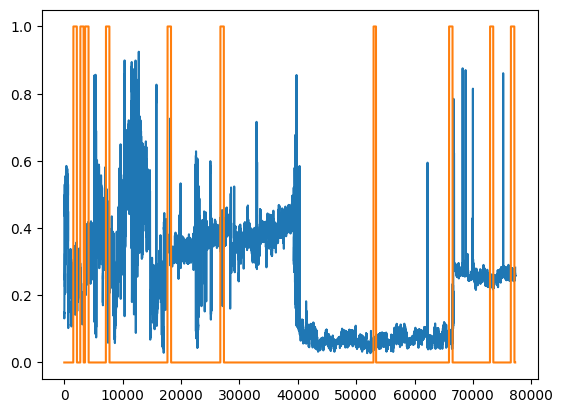

Predition/Test Plot:


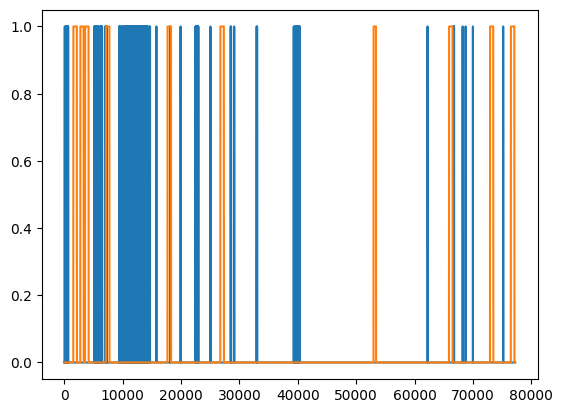

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93     71429
         1.0       0.00      0.00      0.00      5791

    accuracy                           0.88     77220
   macro avg       0.46      0.47      0.47     77220
weighted avg       0.85      0.88      0.86     77220



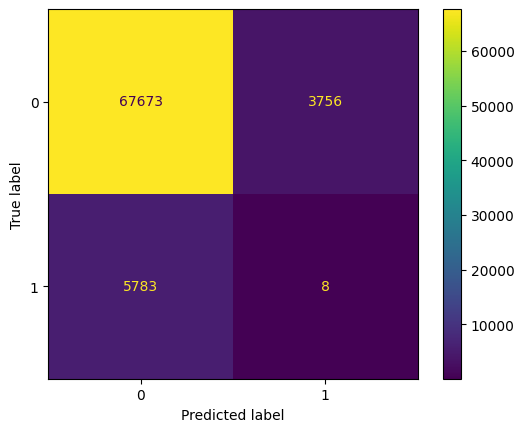

In [3]:
# Import RNN model from the file
modelRNN = tf.keras.models.load_model('../NN/simpleRNN_model.keras')

print("==== MODEL simple RNN ====")

# Predict probabilities
y1_prob = modelRNN.predict(x_test)

# Convert probabilities to binary predictions (> 50% for positive prediction)
y1_pred = (y1_prob >= 0.5).astype(int).squeeze() 

# Confusion Matrix
cm1 = confusion_matrix(y_test, y1_pred)
disp1 = ConfusionMatrixDisplay(cm1)

print("Probability Plot:")
plt.plot(range(len(y1_prob)), y1_prob, y_test)
plt.show()

print("Predition/Test Plot:")
plt.plot(range(len(y1_pred)), y1_pred, y_test)
plt.show()

# Classification Report
report1 = classification_report(y_test, y1_pred)

disp1.plot()
print("Classification Report:\n", report1)

In [4]:
modelRNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 90, 14)         │            29 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 1024)           │     1,063,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,274,658 (20.12 MB)

 Trainable params: 1,756,929 (6.70 MB)

 Non-trainable params: 3,869 (15.12 KB)

 Optimizer params: 3,513,860 (13.40 MB)

## LSTM model benchmark

2025-06-17 16:00:10.774943: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2025-06-17 16:00:10.810800: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2025-06-17 16:00:10.815597: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.
2025-06-17 16:00:10.820438: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16777216 exceeds 10% of free system memory.


==== MODEL LSTM ====
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3171s 1s/step
Probability Plot:


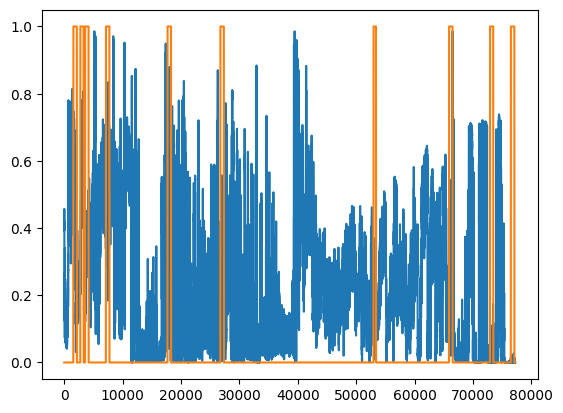

Predition/Test Plot:


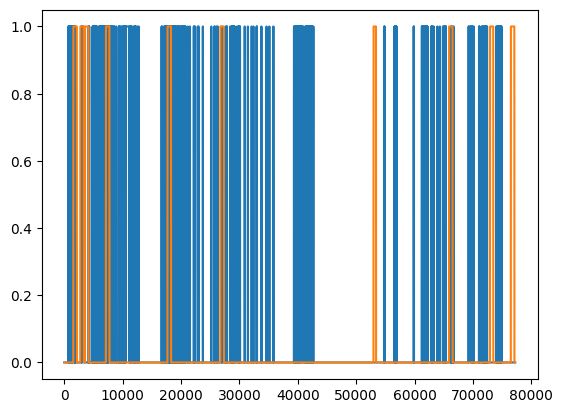

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.90     71429
         1.0       0.13      0.25      0.17      5791

    accuracy                           0.82     77220
   macro avg       0.53      0.56      0.53     77220
weighted avg       0.87      0.82      0.84     77220



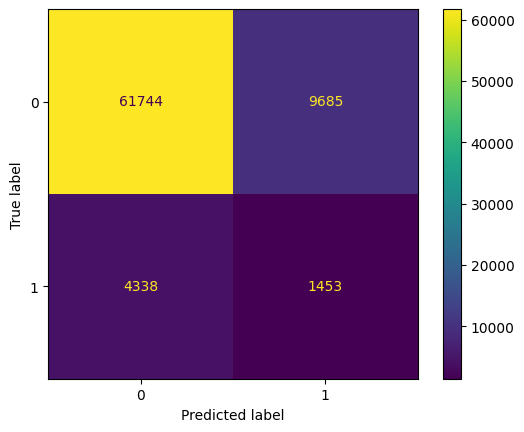

In [5]:
# Import the LSTM model
modelLSTM = tf.keras.models.load_model('../NN/LSTM_model.keras')

print("==== MODEL LSTM ====")

# Predict probabilities
y2_prob = modelLSTM.predict(x_test)

# Convert probabilities to binary predictions (> 50% for positive prediction)
y2_pred = (y2_prob >= 0.5).astype(int).squeeze() 

# Confusion Matrix
cm2 = confusion_matrix(y_test, y2_pred)
disp2 = ConfusionMatrixDisplay(cm2)

print("Probability Plot:")
plt.plot(range(len(y2_prob)), y2_prob, y_test)
plt.show()

print("Predition/Test Plot:")
plt.plot(range(len(y2_pred)), y2_pred, y_test)
plt.show()

# Classification Report
report2 = classification_report(y_test, y2_pred)

disp2.plot()
print("Classification Report:\n", report2)
